# Student : Steven Melendez Lara
### Curso: XTOL - Module 5 - Task 2

### Task Description

Hello,
 
Now that you have created a dedicated local programming environment you're ready to begin your work by preparing and exploring the data. Before we dive in lets review some notes about the project:
 
 Problem:
Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
Revenue and customer loss for clients and, eventually, loss of clients for Credit One
Investigative Questions:

How do you ensure that customers can/will pay their loans? Can we do this?
As you progress through the tasks at hand begin thinking about how to solve this problem. Here are some lessons we learned form a similar problem we addressed last year:

We cannot control customer spending habits
We cannot always go from what we find in our analysis to the underlying "why"
We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
What concrete information can we derive from the data we have?
What proven methods can we use to uncover more information and why?
I'll be expecting a report on your experience in a few days.

 
Thanks,

###  Submit your EDA and Lessons Learned Report
Your task was to create an very detailed EDA in your own Jupyter Notebook and upload your report to your GitHub account. For this task you need to submit the following in the course:

#### 1 - Link to your GitHub account
#### 2 - Copy of your .ipnb file
#### 3 - One page lessons learned that the Data Science team can use for future projects like this.

# Dataset Description

# 1 - Task Solution

## Import Libraries

In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
%matplotlib inline

## Reading Data Set using Pandas

In [12]:
credit = pd.read_csv(r'C:\Users\smele\Documents\XTOL Big Data\Module 5\Task 2 - Prepare and Explore the Data\default of credit card clients.csv', index_col=0, header =1)
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Preprocess Data

In [13]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [15]:
# change variable types
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [17]:
credit.shape

(30000, 24)

In [18]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


## Exploratory Analysis

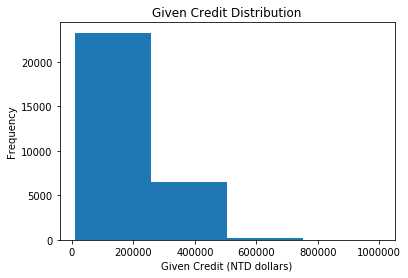

In [19]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.xlabel('Given Credit (NTD dollars)')
plt.ylabel('Frequency')
plt.title('Given Credit Distribution')
plt.show()

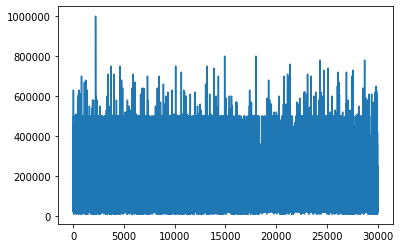

In [20]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [21]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

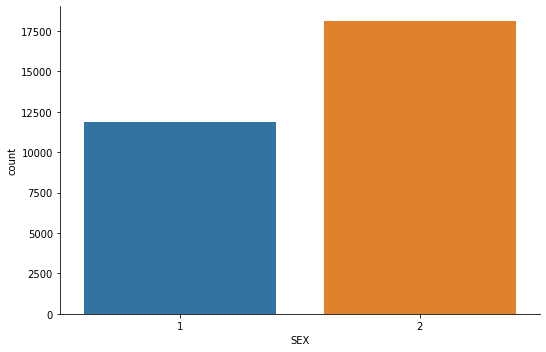

In [22]:
# Plot the number of males and females
sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)

In [23]:
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

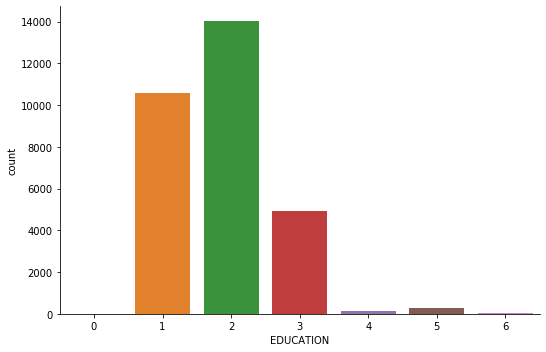

In [24]:
# Plot the number of different levels of education
sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)

In [25]:
# Number of men and women in each of the education class
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4              42
     5              95
     6              25
2    0               6
     1            6231
     2            8656
     3            2927
     4              81
     5             185
     6              26
Name: SEX, dtype: int64

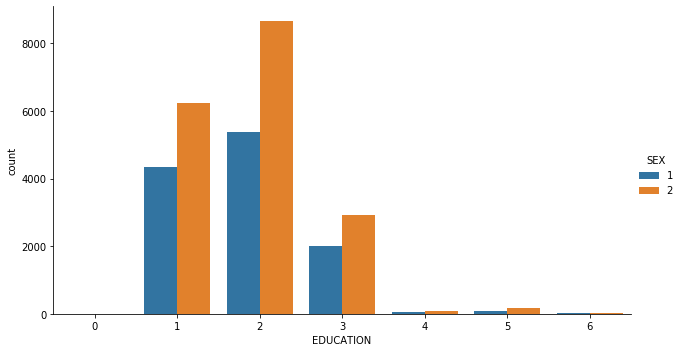

In [26]:
# Plot group by Sex and education
sns.factorplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)

In [27]:
default = credit[credit['default payment next month']==1]
not_default = credit[credit['default payment next month']==0]

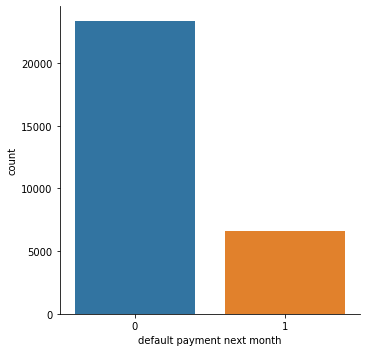

In [28]:
# Factor plot of those who defaulted vs. who didn't
sns.factorplot('default payment next month', data=credit, kind='count')

In [29]:
# Number of customers who defaulted in each educaton class grouped by sex.
credit.pivot_table('default payment next month','SEX', 'EDUCATION', aggfunc=np.sum)

EDUCATION,0
SEX,
1,0
2,0


In [30]:
# Total number of customers who did not defaulted
len(not_default)

23364

SEX: Gender (1=male, 2=female)

In [31]:
# Number of customers who did not default in each education class grouped by sex.
not_default.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=len)

EDUCATION,0,1,2,3,4,5,6
SEX,,,,,,,
1,8,3448,3966,1445,38,89,21
2,6,5101,6734,2235,78,173,22


In [32]:
credit=credit.rename(columns={'default payment next month': 'default'})
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [33]:
# customers who defaulted and who didn't default grouped by Education and marriage class and sex
table = pd.crosstab(index=[credit.default,credit.EDUCATION], columns=[credit.SEX,credit.MARRIAGE])
table.stack()

SEX                            1     2
default EDUCATION MARRIAGE            
0       0         0            0     0
                  1            2     2
                  2            6     4
                  3            0     0
        1         0            1     3
                  1         1300  1653
                  2         2127  3428
                  3           20    17
        2         0            1     4
                  1         1727  3449
                  2         2194  3207
                  3           44    74
        3         0           10    30
                  1          745  1362
                  2          665   792
                  3           25    51
        4         0            0     0
                  1           16    33
                  2           21    43
                  3            1     2
        5         0            0     0
                  1           44    97
                  2           44    74
                  3            1     2
        6         0            0     0
                  1           10    13
                  2           11     7
                  3            0     2
1       1         0            0     0
                  1          390   379
                  2          506   748
                  3           10     3
        2         0            0     1
                  1          643  1023
                  2          746   873
                  3           19    25
        3         0            2     2
                  1          303   451
                  2          229   223
                  3           11    16
        4         0            0     0
                  1            2     1
                  2            2     2
                  3            0     0
        5         0            0     0
                  1            4     5
                  2            2     7
                  3            0     0
        6         0            0     0
                  1            4     1
                  2            0     3
                  3            0     0

In [34]:
table.columns, table.index

(MultiIndex([(1, 0),
             (1, 1),
             (1, 2),
             (1, 3),
             (2, 0),
             (2, 1),
             (2, 2),
             (2, 3)],
            names=['SEX', 'MARRIAGE']), MultiIndex([(0, 0),
             (0, 1),
             (0, 2),
             (0, 3),
             (0, 4),
             (0, 5),
             (0, 6),
             (1, 1),
             (1, 2),
             (1, 3),
             (1, 4),
             (1, 5),
             (1, 6)],
            names=['default', 'EDUCATION']))

In [35]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

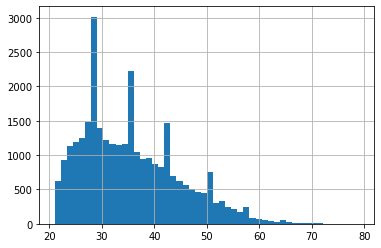

In [36]:
# Plot a histogram of ages
credit['AGE'].hist(bins=50)

In [37]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

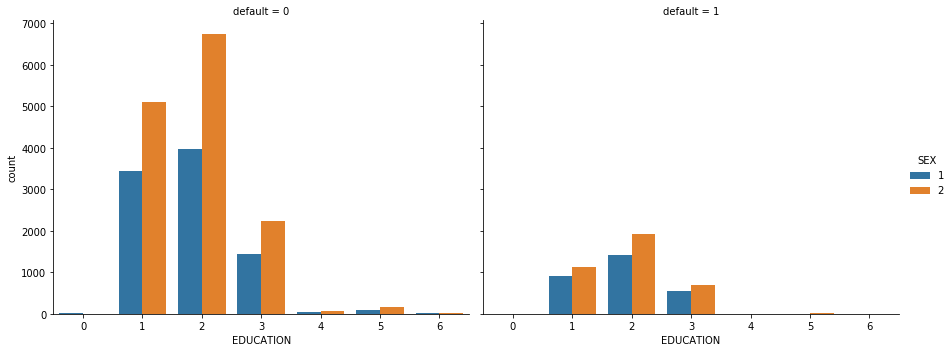

In [38]:
# Split the customers by default 
sns.factorplot('EDUCATION', data=credit, kind='count', hue='SEX', col='default',aspect=1.25, size=5)

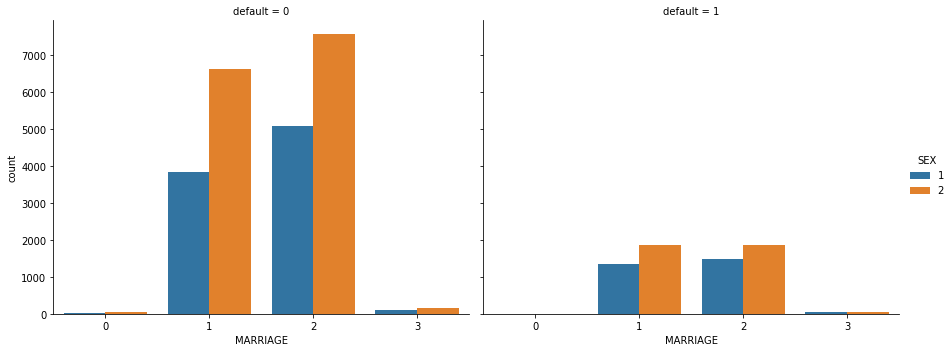

In [45]:
sns.factorplot('MARRIAGE', data=credit, kind='count', hue='SEX', col='default',aspect=1.25, size=5)

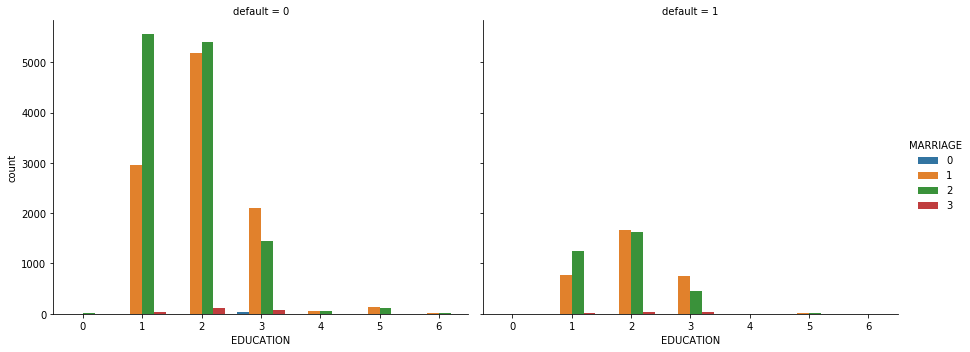

In [46]:
sns.factorplot('EDUCATION', data=credit, kind='count', hue='MARRIAGE', col='default',aspect=1.25, size=5)

# kde plot, Distribution of Customers' Ages
### Grouped by gender

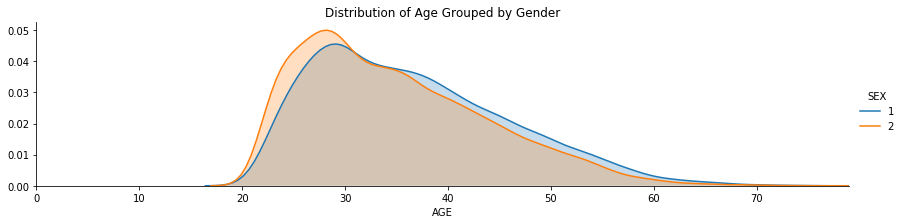

In [47]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

### Grouped by marriage

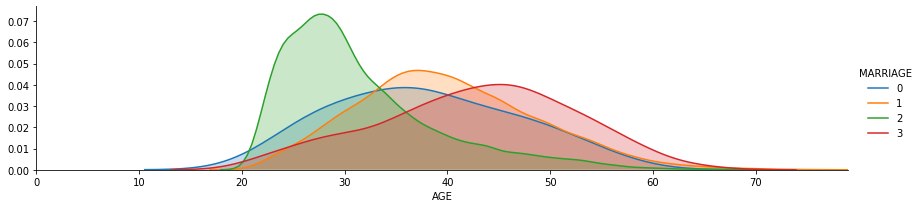

In [48]:
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Grouped by Education

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

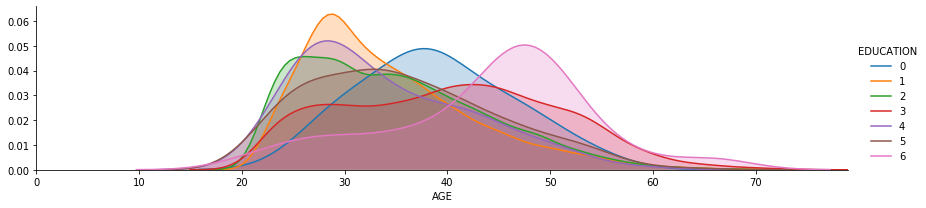

In [49]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Group by Repayment Status

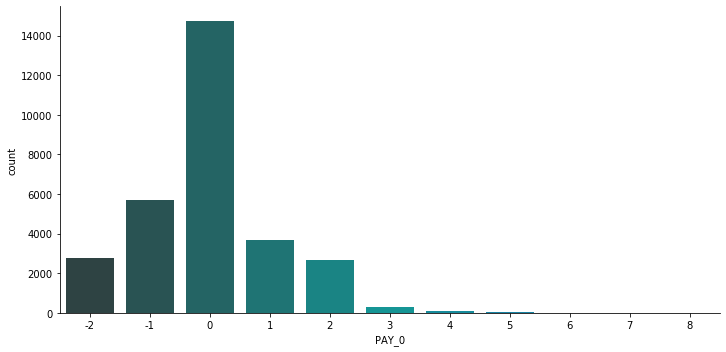

In [50]:
sns.factorplot('PAY_0', data=credit, kind='count',aspect=2,palette='winter_d')

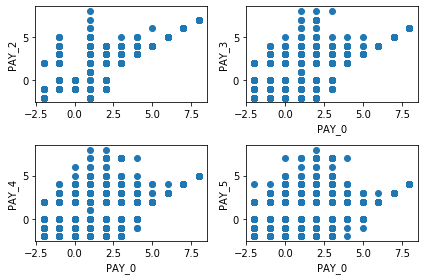

In [51]:
plt.subplot(2,2,1)
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.ylabel('PAY_2')
plt.subplot(2,2,2)
x = credit['PAY_0']
y = credit['PAY_3']
plt.scatter(x,y)
plt.xlabel('PAY_0')
plt.ylabel('PAY_3')
plt.subplot(2,2,3)
x = credit['PAY_0']
y = credit['PAY_4']
plt.scatter(x,y)
plt.xlabel('PAY_0')
plt.ylabel('PAY_4')
plt.subplot(2,2,4)
x = credit['PAY_0']
y = credit['PAY_5']
plt.scatter(x,y)
plt.xlabel('PAY_0')
plt.ylabel('PAY_5')
plt.tight_layout()
plt.show()

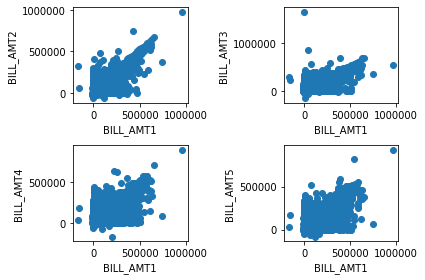

In [52]:
plt.subplot(2,2,1)
x = credit['BILL_AMT1']
y = credit['BILL_AMT2']
plt.scatter(x,y)
plt.xlabel('BILL_AMT1')
plt.ylabel('BILL_AMT2')
plt.subplot(2,2,2)
x = credit['BILL_AMT1']
y = credit['BILL_AMT3']
plt.scatter(x,y)
plt.xlabel('BILL_AMT1')
plt.ylabel('BILL_AMT3')
plt.subplot(2,2,3)
x = credit['BILL_AMT1']
y = credit['BILL_AMT4']
plt.scatter(x,y)
plt.xlabel('BILL_AMT1')
plt.ylabel('BILL_AMT4')
plt.subplot(2,2,4)
x = credit['BILL_AMT1']
y = credit['BILL_AMT5']
plt.scatter(x,y)
plt.xlabel('BILL_AMT1')
plt.ylabel('BILL_AMT5')
plt.tight_layout()
plt.show()

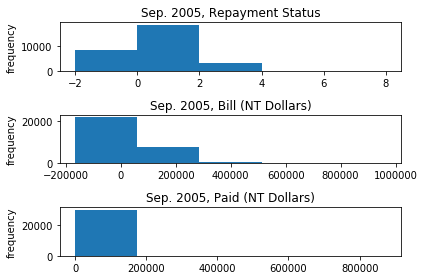

In [53]:
plt.subplot(3,1,1)
plt.hist(credit['PAY_0'], bins = 5)
plt.ylabel('frequency')
plt.title('Sep. 2005, Repayment Status')
plt.subplot(3,1,2)
plt.hist(credit['BILL_AMT1'], bins = 5)
plt.ylabel('frequency')
plt.title('Sep. 2005, Bill (NT Dollars)')
plt.subplot(3,1,3)
plt.hist(credit['PAY_AMT1'], bins = 5)
plt.ylabel('frequency')
plt.title('Sep. 2005, Paid (NT Dollars)')
plt.tight_layout()
plt.show()

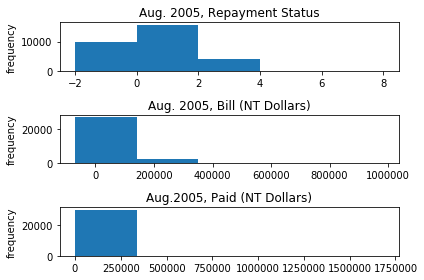

In [54]:
plt.subplot(3,1,1)
plt.hist(credit['PAY_2'], bins = 5)
plt.ylabel('frequency')
plt.title('Aug. 2005, Repayment Status')
plt.subplot(3,1,2)
plt.hist(credit['BILL_AMT2'], bins = 5)
plt.ylabel('frequency')
plt.title('Aug. 2005, Bill (NT Dollars)')
plt.subplot(3,1,3)
plt.hist(credit['PAY_AMT2'], bins = 5)
plt.ylabel('frequency')
plt.title('Aug.2005, Paid (NT Dollars)')
plt.tight_layout()
plt.show()

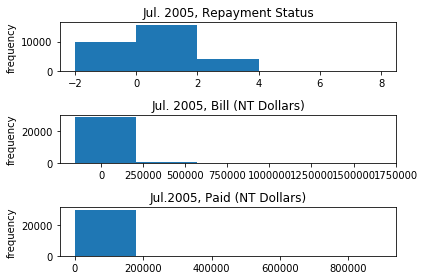

In [55]:
plt.subplot(3,1,1)
plt.hist(credit['PAY_3'], bins = 5)
plt.ylabel('frequency')
plt.title('Jul. 2005, Repayment Status')
plt.subplot(3,1,2)
plt.hist(credit['BILL_AMT3'], bins = 5)
plt.ylabel('frequency')
plt.title('Jul. 2005, Bill (NT Dollars)')
plt.subplot(3,1,3)
plt.hist(credit['PAY_AMT3'], bins = 5)
plt.ylabel('frequency')
plt.title('Jul.2005, Paid (NT Dollars)')
plt.tight_layout()
plt.show()

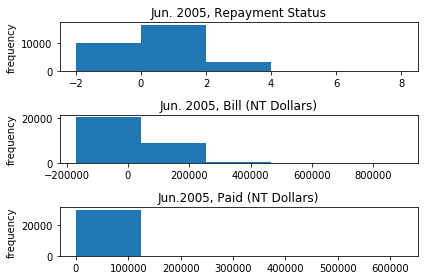

In [56]:
plt.subplot(3,1,1)
plt.hist(credit['PAY_4'], bins = 5)
plt.ylabel('frequency')
plt.title('Jun. 2005, Repayment Status')
plt.subplot(3,1,2)
plt.hist(credit['BILL_AMT4'], bins = 5)
plt.ylabel('frequency')
plt.title('Jun. 2005, Bill (NT Dollars)')
plt.subplot(3,1,3)
plt.hist(credit['PAY_AMT4'], bins = 5)
plt.ylabel('frequency')
plt.title('Jun.2005, Paid (NT Dollars)')
plt.tight_layout()
plt.show()

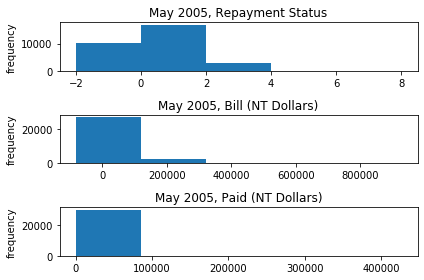

In [57]:
plt.subplot(3,1,1)
plt.hist(credit['PAY_5'], bins = 5)
plt.ylabel('frequency')
plt.title('May 2005, Repayment Status')
plt.subplot(3,1,2)
plt.hist(credit['BILL_AMT5'], bins = 5)
plt.ylabel('frequency')
plt.title('May 2005, Bill (NT Dollars)')
plt.subplot(3,1,3)
plt.hist(credit['PAY_AMT5'], bins = 5)
plt.ylabel('frequency')
plt.title('May 2005, Paid (NT Dollars)')
plt.tight_layout()
plt.show()

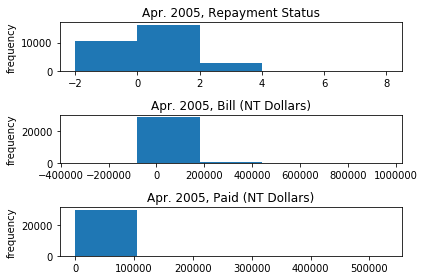

In [58]:
plt.subplot(3,1,1)
plt.hist(credit['PAY_6'], bins = 5)
plt.ylabel('frequency')
plt.title('Apr. 2005, Repayment Status')
plt.subplot(3,1,2)
plt.hist(credit['BILL_AMT6'], bins = 5)
plt.ylabel('frequency')
plt.title('Apr. 2005, Bill (NT Dollars)')
plt.subplot(3,1,3)
plt.hist(credit['PAY_AMT6'], bins = 5)
plt.ylabel('frequency')
plt.title('Apr. 2005, Paid (NT Dollars)')
plt.tight_layout()
plt.show()

In [59]:
corrMat = credit.corr()
print(corrMat)

                 ID  LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
ID         1.000000   0.026179  0.018678   0.019389   0.017982   0.024354   
LIMIT_BAL  0.026179   1.000000  0.144713   0.285430   0.278314   0.283236   
AGE        0.018678   0.144713  1.000000   0.056239   0.054283   0.053710   
BILL_AMT1  0.019389   0.285430  0.056239   1.000000   0.951484   0.892279   
BILL_AMT2  0.017982   0.278314  0.054283   0.951484   1.000000   0.928326   
BILL_AMT3  0.024354   0.283236  0.053710   0.892279   0.928326   1.000000   
BILL_AMT4  0.040351   0.293988  0.051353   0.860272   0.892482   0.923969   
BILL_AMT5  0.016705   0.295562  0.049345   0.829779   0.859778   0.883910   
BILL_AMT6  0.016730   0.290389  0.047613   0.802650   0.831594   0.853320   
PAY_AMT1   0.009742   0.195236  0.026147   0.140277   0.280365   0.244335   
PAY_AMT2   0.008406   0.178408  0.021785   0.099355   0.100851   0.316936   
PAY_AMT3   0.039151   0.210167  0.029247   0.156887   0.150718   0.130011   

In [60]:
covMat = credit.iloc[:,1:25].cov()
print(covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

# 2 - Analysis

### Conclusions